### 【BeautifulSoup 패키지】
- 뷰티플 수프는 HTML과 XML 문서를 파싱하기위한 파이썬 패키지입니다. 웹 스크래핑에 유용한 HTML에서 데이터를 추출하는 데 사용할 수있는 구문 분석 된 페이지에 대한 구문 분석 트리를 생성합니다.
- from bs4 import BeautifulSoup     로 모듈을 실행합니다.  모듈 에러시 모듈을 !pip install beautifulsoup4 로 설치합니다.
- https://www.crummy.com/software/BeautifulSoup/bs4/doc/


In [3]:
test_html = """<html> \
            <body> \
                <h1 id='title'>[1]크롤링이란?</h1> \
                <p class='cssstyle'>웹페이지에서 필요한 데이터를 추출하는 것</p> \
                <p id='body' align='center'>파이썬을 중심으로 다양한 웹크롤링 기술 발달</p> \
            </body> \
        </html>"
"""

In [4]:
#########################
## 미션
## test_html을 bs4모듈에서 불러오고 print합니다..(파싱)
from bs4 import BeautifulSoup
soup = BeautifulSoup(test_html, "html.parser")
soup

<html> <body> <h1 id="title">[1]크롤링이란?</h1> <p class="cssstyle">웹페이지에서 필요한 데이터를 추출하는 것</p> <p align="center" id="body">파이썬을 중심으로 다양한 웹크롤링 기술 발달</p> </body> </html>"

In [5]:
#########################
## 미션
## 처음나오는 p 태그를 검색하고 그 태그의 텍스트를 표시합니다.

tagFind=soup.find('p')
re=tagFind.string
re

'웹페이지에서 필요한 데이터를 추출하는 것'

### 【html에서 추출한 데이터에서 형태소분석을 하였습니다.】

In [6]:
#########################
## 미션
## <h1> , <P> 태그의 내용을 검색하는 for를 작성합니다.
## html_h1 과 html_p 변수에  각 내용을 저장합니다.
html_h1=0 ; html_p=0
list=['h1','p']

for i in list:
    tagFind=soup.find(i)  # 맨위에 나와 있는 첫번째 자료만 찾기
    re=tagFind.string
    if i=='h1':
        html_h1=re
    elif i=='p':
        html_p=re

print("html_h1 의 변수 내용은==>",html_h1)
print("html_p 의 변수 내용은==>",html_p)



html_h1 의 변수 내용은==> [1]크롤링이란?
html_p 의 변수 내용은==> 웹페이지에서 필요한 데이터를 추출하는 것


In [7]:
#########################
## ## 저장된 html_h1과 html_P 태그를 형태소 분석을 실시하면 자동 list가 됩니다.
##
### okt의 명사단위로 나누세요

from konlpy.tag import Okt
okt=Okt()

print('\n--------- 형태소 분석 -----------')
print(okt.morphs(html_h1))
print(okt.morphs(html_p))

print('\n---------명사 -----------')
print(okt.nouns(html_h1))
print(okt.nouns(html_p))

print('\n--------품사 태깅 -----------')
print(okt.pos(html_h1))
print(okt.pos(html_p))

print('\n--------품사 태깅중 Noun만 추출합니다. -----------')
pos_=okt.pos(html_p) ; noun_=[]

for i in pos_:
    if i[1]=='Noun':
        noun_.append(i)
print(noun_)
        

print('\n\n--(참고: 1109일 토요일 자료) 위의 for 구문을 아래와 같이 한줄로 작성가능합니다. ---')

ttt=[i for i in pos_ if i[1]=='Noun']
print(ttt)


--------- 형태소 분석 -----------
['[', '1', ']', '크', '롤링', '이란', '?']
['웹페이지', '에서', '필요한', '데이터', '를', '추출', '하는', '것']

---------명사 -----------
['롤링']
['웹페이지', '데이터', '추출', '것']

--------품사 태깅 -----------
[('[', 'Punctuation'), ('1', 'Number'), (']', 'Punctuation'), ('크', 'Verb'), ('롤링', 'Noun'), ('이란', 'Josa'), ('?', 'Punctuation')]
[('웹페이지', 'Noun'), ('에서', 'Josa'), ('필요한', 'Adjective'), ('데이터', 'Noun'), ('를', 'Josa'), ('추출', 'Noun'), ('하는', 'Verb'), ('것', 'Noun')]

--------품사 태깅중 Noun만 추출합니다. -----------
[('웹페이지', 'Noun'), ('데이터', 'Noun'), ('추출', 'Noun'), ('것', 'Noun')]


--(참고: 1109일 토요일 자료) 위의 for 구문을 아래와 같이 한줄로 작성가능합니다. ---
[('웹페이지', 'Noun'), ('데이터', 'Noun'), ('추출', 'Noun'), ('것', 'Noun')]


In [110]:
ttt

[('웹페이지', 'Noun'), ('데이터', 'Noun'), ('추출', 'Noun'), ('것', 'Noun')]

In [8]:
import pandas as pd

word=[i[0] for i in pos_]
mor=[i[1] for i in pos_]

dict_data={'word':word,'품사':mor}
db=pd.DataFrame(dict_data)
db

,word,품사
0,웹페이지,Noun
1,에서,Josa
2,필요한,Adjective
3,데이터,Noun
4,를,Josa
5,추출,Noun
6,하는,Verb
7,것,Noun


In [23]:
#########################
## 미션
## p 태그의 모든 텍스트를 출력합니다.
### 모든 텍스트를 갖고옴
### 태그를 제외하고 텍스트만 출력하는 명령어는 get_text
## get_text는 문자열만 출력가능, 리스트 통으로 출력 불가능
태그포함=soup.find_all('p')
print(태그포함,'\n\n')

for i in 태그포함:
    print(i.get_text())
    
#위의 구문을 한줄로 변형해보세요.
ttt=[i for i in pos_ if i[1]=='Noun']

[<p class="cssstyle">웹페이지에서 필요한 데이터를 추출하는 것</p>, <p align="center" id="body">파이썬을 중심으로 다양한 웹크롤링 기술 발달</p>] 


웹페이지에서 필요한 데이터를 추출하는 것
파이썬을 중심으로 다양한 웹크롤링 기술 발달


In [11]:
#########################
## 미션
## p 태그중  class='cssstyle' 인 내용만 출력합니다.

soup.find_all('p',attrs={'class':'cssstyle'})

[<p class="cssstyle">웹페이지에서 필요한 데이터를 추출하는 것</p>]

### [미술관옆 동물원 시나리오.htm] 분석 워드클라우드


In [71]:
from bs4 import BeautifulSoup

with open("미술관옆동물원(시나리오샘플국립국어원).html") as fp:
    soup = BeautifulSoup(fp, 'html.parser')
soup


<!DOCTYPE tei.2 SYSTEM "c:\sgml\dtd\tei2.dtd" [
	<!ENTITY % TEI.corpus "INCLUDE">

<!--ENTITY % TEI.extensions.ent SYSTEM "sejong1.ent"-->
<!--ENTITY % TEI.extensions.dtd SYSTEM "sejong1.dtd"-->
]&gt;

<tei.2>
<teiheader>
<filedesc>
<titlestmt>
<title>미술관 옆 동물원 (시나리오), 전자파일</title>
<author>이정향</author>
<sponsor>대한민국 문화관광부</sponsor>
<respstmt>
<resp>전자/표준화</resp>
<name>연세대학교 언어정보개발연구원</name>
</respstmt>
</titlestmt>
<extent>11638 어절</extent>
<publicationstmt>
<distributor>국립국어연구원</distributor>
<idno>2CJ00052.HWP</idno>
<availability>배포 불가</availability>
</publicationstmt>
<notesstmt>
<note>감독 이정향제작년도 1998년상영시간 108분장르 멜로</note>
</notesstmt>
<sourcedesc>
<bibl>
<author>이정향</author>
<title>미술관 옆 동물원</title>
</bibl>
</sourcedesc>
</filedesc>
<encodingdesc>
<projectdesc>21세기 세종계획 2차연도 말뭉치 구축</projectdesc>
<samplingdecl>원본 데이터를 PC 파일로 변환</samplingdecl>
<editorialdecl>21세기 세종계획 말뭉치 문헌 입력 지침에 따름</editorialdecl>
</encodingdesc>
<profiledesc>
<creation>
<date>1998</date>
</creation>
<langusage>
<

In [72]:
## 등장인물 출력
castitem=soup.find_all('castitem')
castitem_=[i.get_text() for i in castitem]
print(castitem_)

## castitem_=[i.get_text() for i in castitem] 은
## 아래의 for 구문과 같음
# castitem_=[]
# for i in castitem:
#     castitem_.append(i)

print('등장인물은 총 몇명?' , len(castitem_))


['이춘희', '한철수', '현실의 인공 ― 상상의 인공', '현실의 다혜 ― 상상의 다혜', '집주인', '국회의원', '젊은 보좌관', '신랑, 신부 1쌍', '신혼부부', '중년부부', '노년부부', '중년부부의 아이들']
등장인물은 총 몇명? 12



 몇신? 103

--------- 형태소 분석 -----------


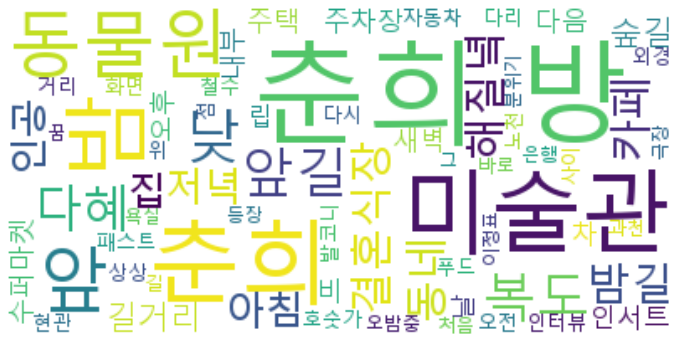

In [73]:
# 신넘버 제목만 출력하고 몇개의 신이 있는 지 출력
scnum=soup.find_all('scnum')
scnum_=[i.get_text() for i in scnum]
print('\n 몇신?' , len(scnum_))
#scnum_

# 명사단위로 나누어서 워드클라우드 하려함
from konlpy.tag import Okt
okt=Okt()

print('\n--------- 형태소 분석 -----------')
#scnumStr=''
#for li in scnum_:
#    scnumStr=scnumStr+li
#    
#scnumStr 
#okt.nouns(scnumStr)

명사추출=okt.nouns(scStr)

scStr=' '.join(명사추출)  #for와 같음. join구문에서는 변수 초기화안해도됨


from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

wc = WordCloud('c:/python_data/malgun.ttf',
                background_color = "white", 
               max_words = 2000)
               #stopwords = stopwords)
wc = wc.generate(scStr)      # str자료만 가능, list자료는 안됨

plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [62]:
# 파이썬이 제공하는 count 함수 를 사용할때는
# 자료가 리스트구조여야함.

from collections import Counter
#다시리스트로=명사추출.split(' ')
Counter(명사추출).most_common(10)  #상위10개

[('춘희', 40),
 ('방', 25),
 ('미술관', 15),
 ('밤', 14),
 ('동물원', 12),
 ('앞', 11),
 ('낮', 7),
 ('복도', 6),
 ('앞길', 6),
 ('다혜', 5)]

## Counter를 직접 만들수도 있습니다.
- #검색하는명사=명사추출

# 단어중복 없애고 단일값만 가져가는 방법
-  단어유일기억리스트=[] ; 있음=0
- for i in 명사추출:
-     for j in 단어유일기억리스트:
-        if i==j:
-            있음=있음+1
-    if 있음=0:
-        단어유일기억리스트.append(i)
        

- cnt=0
- for i in 명사추출:
-    for 명사리스트 in 명사추출:
-        if i==명사리스트:
-            cnt=cnt+1
-    print(i + "---->"+ str(cnt))

## stage 태그의 내용만 찾아서
## 워드클라우드 작업 실행해보세요